## Discovering Symbolic Models from Deep Learning with Inductive Biases

```console
@ARTICLE{2020arXiv200611287C,
       author = {{Cranmer}, Miles and {Sanchez-Gonzalez}, Alvaro and {Battaglia}, Peter and
         {Xu}, Rui and {Cranmer}, Kyle and {Spergel}, David and {Ho}, Shirley},
        title = "{Discovering Symbolic Models from Deep Learning with Inductive Biases}",
      journal = {arXiv e-prints},
     keywords = {Computer Science - Machine Learning, Astrophysics - Cosmology and Nongalactic Astrophysics, Astrophysics - Instrumentation and Methods for Astrophysics, Physics - Computational Physics, Statistics - Machine Learning},
         year = 2020,
        month = jun,
          eid = {arXiv:2006.11287},
        pages = {arXiv:2006.11287},
archivePrefix = {arXiv},
       eprint = {2006.11287},
 primaryClass = {cs.LG},
       adsurl = {https://ui.adsabs.harvard.edu/abs/2020arXiv200611287C},
      adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}
```

Well, to start off mathematical formulations made by Neural Networks help Natural Laws become a lot more explainable. In the same manner it does for Physics Models.

#### Symbolic Regression (Want to explore)
``` 
Symbolic regression is one option: a supervised machine learning technique 
that assembles analytic functions to model a given dataset.
```
Generally explored using Genetic Algorithms, as talked explored in the paper. Followed by discussing the issues with DL models 
1. esentially being Black Box functions. Which we do not understand or rather it is extremely cumbersome to form any kind of understanding off them.
2. Issues with Generalization

Leading to GNNs, which solves:
1. strong and well-motivated inductive biases
2. apply symbolic regression to fit different internal parts of the learned  model that operate on reduced size representations.

---
### Tangent 1: Inductive Biases
The inductive bias (also known as learning bias) of a learning algorithm is the set of assumptions that the learner uses to predict outputs of given inputs that it has not encountered. In machine learning, one aims to construct algorithms that are able to learn to predict a certain target output. [wikipedia](https://en.wikipedia.org/wiki/Inductive_bias#:~:text=The%20inductive%20bias%20(also%20known,predict%20a%20certain%20target%20output.)

Generealization? since the article goes on to say:

The learner is supposed to approximate the correct output, even for examples that have not been shown during training. Without any additional assumptions, this problem cannot be solved exactly since unseen situations might have an arbitrary output value. The kind of necessary assumptions about the nature of the target function are subsumed in the phrase inductive bias.

---

## GNN:

Lots of implementation have been seen in Physics, which is interesting. 

---
### Tangent 2:
Exploring options:
1. Robotics kinematics
2. Games maybe RL
3. Text, I wanna see whether embeddings can become cooler or whether a value for bias can be generated for a given corpus
4. 3D rendering in Games

---

Internally, GNs are structured into three distinct components: an edge model, a node model, and a
global model, which take on different but explicit roles in a regression problem. The edge model, or
“message function,” which we denote by φ
e
, maps from a pair of nodes (vi
, vj ∈ R
Lv ) connected by
an edge in a graph together with some vector information for the edge, to a message vector. These
message vectors are summed element-wise for each receiving node over all of their sending nodes,
and the summed vector is passed to the node model. The node model, φ
v
, takes the receiving node
and the summed message vector, and computes an updated node: a vector representing some property
or dynamical update. Finally, a global model φ
u
aggregates all messages and all updated nodes
and computes a global property. φ
e
, φ
v
, φ
u
are usually approximated using multilayer-perceptrons,
making them differentiable end-to-end. [Directly from the paper](https://arxiv.org/pdf/2006.11287.pdf)

Take a look here:
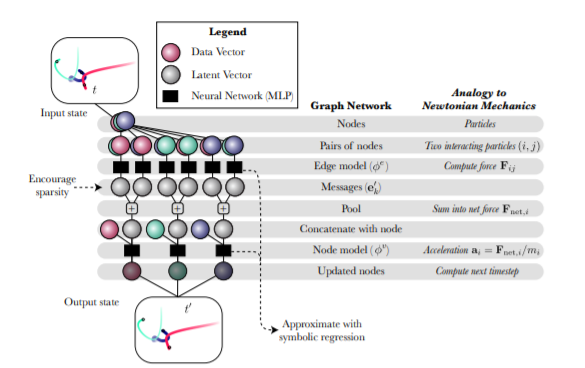

Reasons they have provided for using GNNs:
1. They are equivariant under particle permutations. 
2. They are differentiable end-to-end
and can be trained efficiently using gradient descent. 
3. They make use of three separate and
interpretable internal functions φ
e
, φ
v
, φ
u
, which are our targets for the symbolic regression.

## Symbolic Regression:

As for Symbolic Regression the Package `eureqa` was used. `eureqa` works by using a genetic algorithm to combine algebraic
expressions stochastically. The technique is analogous to natural selection, where the “fitness” of
each expression is defined in terms of simplicity and accuracy. The operators considered in the fitting
process are +, −, ×, /, >, <, ^, exp, log, IF(·, ·, ·) as well as real constants.

## Fitting:

After fitting expressions
to each part of the graph network, they substituted the expressions into the model to create an alternative
analytic model. It was then refit for every parameters in the symbolic model to the data a second time, to avoid the accumulated approximation error. The key advantage of fitting a symbolic model on internal GN functions is that the symbolic regression
never needs to consider more than two particles at once. This makes the symbolic regression problem
tractable.

<br>

Regularization is done cause of the principle of Occam's Razor, which makes sense. Since Regularization reduces and gets rid of useless features and manages weights and feature importance really well, while taking low computational resources.

## Datasets:

The paper progresses into Case Studies for particular simulations and theorems, I'm simply going to name the rest here and give one line descriptions for them but will explore Newtonian Dynamics properly. Followed by what was performed on them and their final results.

1. Newtonian dynamics: 
Newtonian dynamics describes the dynamics of particles according to
Newton’s law of motion: the motion of each particle is modeled using incident forces from nearby
particles, which change its position, velocity and acceleration.

Description: Different Newtonian Laws were explored over a N-body system.

Base Aim: The models are trained to predict instantaneous acceleration for every particle given the current state of the system.

* Standard, a GN with 100 message components; 
* Bottleneck, a GN with the number of message components matching the dimensionality of the problem (2 or 3); 
* L1, same as “Standard” but using a L1 regularization loss term on the messages with a weight of 10−2; and 
* KL same as “Standard” but regularizing the messages using the Kullback-Leibler (KL) divergence with respect to Gaussian
prior. 

Discoveries: Both the L1 and KL strategies encourage the network to find compact representations for the message vectors. 

Aim: The mean absolute loss between the predicted acceleration and the true acceleration of each node.

Performance: L1 best.

Symbolic Regression: Symbolic regression to
extract force laws from the messages, without using prior knowledge for each force’s form. To do
this, we record the most significant message component of φ
e
, which we refer to as φ
e
1
, over random
samples of the training dataset. 

The inputs to the regression are m1, m2, q1, q2, x1, x2, . . . (mass,
charge, x-position of receiving and sending node) as well as simplified variables to help the symbolic
regression: e.g., ∆x for x displacement, and r for distance. Followed by `eureqa` to fit e φ
e
1
to the inputs by minimizing the mean absolute error (MAE) over
various analytic functions. 

`eureqa` to provide multiple candidate fits at different complexity levels (where complexity is scored as
a function of the number and the type of operators, constants and input variables used), and select the
fit that maximizes the fractional drop in mean absolute error (MAE) over the increase in complexity
from the next best model.



<br><br><br>

2. Hamiltonian dynamics. 
Hamiltonian dynamics defines a single scalar function for an entire system,
corresponding to the total energy of the system, H, that determines the derivatives of the canonical
position (q) and momentum (p). In short, Hamilton’s equations can be described as following:
 q˙ =
∂H/
∂p
and p˙ = −
∂H/
∂q.




3. Dark matter:
halos for cosmology. We also apply our framework to a dataset generated from stateof-the-art dark matter simulations

---
### Tangent 3:

Implementation of GNN

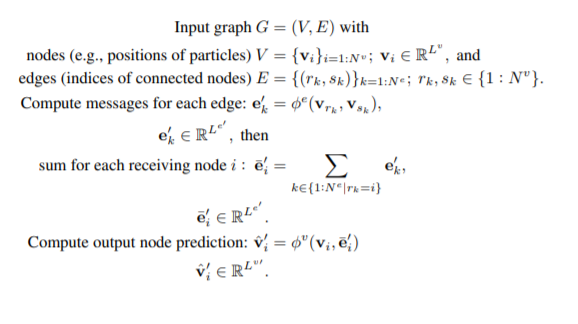


Explaination:
1. use the graph G = (V, E) to predict an updated graph G0 = (V
0
, E). Our input
dataset is a graph G = (V, E) consisting of Nv nodes with L
v
features each: V = {vi}i=1:Nv ,
with each vi ∈ R
L
v
. The nodes are connected by Ne
edges: E = {(rk, sk)}k=1:Ne , where
rk, sk ∈ {1 : Nv} are the indices for the receiving and sending nodes, respectively. We would like
to use this graph to predict another graph V
0 = {v
0
i
}i=1:Nv , where each v
0
i ∈ R
L
v0
is the node
corresponding to vi
. The number of features in these predicted nodes, L
v0
, need not necessarily be
the same as for the input nodes (L
v
), though this could be the case for dynamical models where one
is predicting updated states of particles. For more general regression problems, the number of output
features is arbitrary
2. Edge model. The prediction is done in two parts. We create the first neural network, the edge model
(or “message function”), to compute messages from one node to another: φ
e
: R
L
v
× R
L
v → R
L
e
0
.
Here, L
e
0
is the number of message features. In the bottleneck model, one sets L
e
0
equal to the known
dimension of the force, which is 2 or 3 for us. In our models, we set L
e
0
= 100 for the standard and
L1 models, and 200 for the KL model (which is described separately later on). We create φ
e
as a
multi-layer perceptron with ReLU activations and two hidden layers, each with 300 hidden nodes.
The mapping is e
0
k = φ
e
(vrk
, vsk
) for all edges indexed by k (i.e., we concatenate the receiving and
sending node features).
3. Aggregation. These messages are then pooled via element-wise summation for each receiving
node i into the summed message, e¯
0
i ∈ R
L
e
0
. This can be written as e¯
0
i =
P
k∈{1:Ne|rk=i}
e
0
k
.
4. Node model. We create a second neural network to predict the output nodes, v
0
i
, for each i from the
corresponding summed message and input node. This net can be written as φ
v
: R
L
v
×R
L
e
0
→ R
L
v0
,
and has the mapping: vˆ
0
i = φ
v
(vi
, e¯
0
i
), where vˆ
0
i
is the prediction for v
0
i
. We also create φ
v
as a
14
multi-layer perceptron with ReLU activations and two hidden layers, each with 300 hidden nodes.
This model is then trained with the loss function as described later in this section.

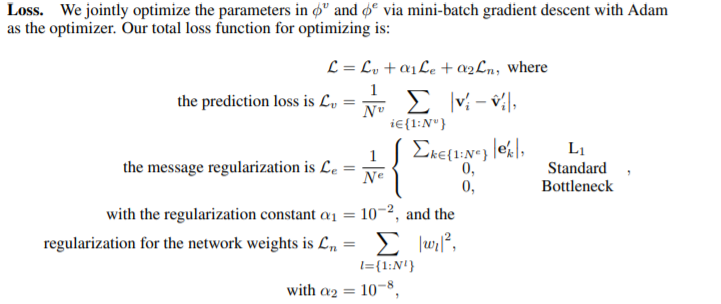